cf. 자동줄바꿈
->https://optimizing.tistory.com/10

## NLTK의 word_tokenize 사용

In [29]:
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Affinity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
from nltk.tokenize import word_tokenize

In [4]:
print(word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


## wordpunctTokenizer 사용

In [5]:
from nltk.tokenize import WordPunctTokenizer
WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.")

['Don',
 "'",
 't',
 'be',
 'fooled',
 'by',
 'the',
 'dark',
 'sounding',
 'name',
 ',',
 'Mr',
 '.',
 'Jone',
 "'",
 's',
 'Orphanage',
 'is',
 'as',
 'cheery',
 'as',
 'cheery',
 'goes',
 'for',
 'a',
 'pastry',
 'shop',
 '.']

토큰화에서 고려해야할 사항
- 구두점이나 특수문자를 단순 제외해서는 안됨
- 구두점조차도 하나의 토큰으로 분류하기도 함
 - ex. 단어 자체에서 구두점을 갖고 있는 m.p.h나 ph.D, AT&T같은 경우
 - 특수문자의 $ -> 가격 의미, / -> 01/02/06 같은 날짜 의미
 - 123,456,789와 같이 세 자리 단위로 숫자 사이에 컴마(,)가 들어가는 경우

## Penn Treebank Tokenization - 표준 토큰화 예제
1. 하이픈으로 구성된 단어는 하나로 유지
2. doesn't와 같이 '로 '접어'가 함께하는 단어는 분리

In [6]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."
tokenizer.tokenize(text)

['Do',
 "n't",
 'be',
 'fooled',
 'by',
 'the',
 'dark',
 'sounding',
 'name',
 ',',
 'Mr.',
 'Jone',
 "'s",
 'Orphanage',
 'is',
 'as',
 'cheery',
 'as',
 'cheery',
 'goes',
 'for',
 'a',
 'pastry',
 'shop',
 '.']

In [7]:
text = "Starting a home-based restaurant may be an ideal. It doesn't have a food chain or restaurant of their own"
tokenizer.tokenize(text)

['Starting',
 'a',
 'home-based',
 'restaurant',
 'may',
 'be',
 'an',
 'ideal.',
 'It',
 'does',
 "n't",
 'have',
 'a',
 'food',
 'chain',
 'or',
 'restaurant',
 'of',
 'their',
 'own']

한국어 토큰화의 어려움
- 한국어는 영어(단어 토큰화)와 달리 띄어쓰기로만으로는 토큰화를 하기 부족.
- 한국어는 띄어쓰기 단위가 되는 단위를 어절이라고 하는데, 어절 토큰화는 한국어 NLP에서 지양되고 있음. 어절 토큰화와 단어 토큰화가 같지 않기 때문.
- 그 이유는 한국어는 교착어이기 때문. (조사, 어미 등을 붙여 말을 만드는 언어)
- 같은 단어임에도 서로 다른 조사가 붙어서 다른 단어로 인식이 되면 자연어 처리가 힘들고 번거로워지는 경우가 많음
 - ex. 그가, 그에게, 그를, 그와, 그는
- 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않음
 - 띄어쓰기가 지켜지지 않아도 글을 쉽게 이해할 수 있음
 - ex1. 띄어쓰기를안하고글을써도글이해가능함
 - ex2. Tobeornottobethatisthequestion

형태소
- 의미를 가지는 최소의 단위. 어휘적 의미와 문법적 의미를 모두 포함
 - 자립 형태소
   - 접사, 어미, 조사와 상관엇ㅂ이 자립하여 사용할 수 있는 형태소
   - 그 자체로 단어가 됨
   - 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등이 있음
 - 의존 형태소
   - 다른 형태소와 결합하여 사용되는 형태소
   - 접사, 어미, 조사, 어간

형태소 분석
 - 형태소보다 단위가 큰 언어 단위인 어절, 혹은 문장을 최소 의미 단위인 형태소로 분절하는 과정
 - '어절 분석' / '형태론적 분석'이 더 적합한 용어

품사
- 공통된 성질을 지닌 낱말의 범주
- 대표적으로 KoNLPy

NLTK를 이용한 영어 토큰화 실습
- NLTK에서는 Penn Treebank POS Tags 기준 사용

In [17]:
from nltk.tokenize import word_tokenize
text = "I am actively looking for Ph.D. students. and you are a ph.D. student."
print(word_tokenize(text))

['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'ph.D.', 'student', '.']


In [9]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Affinity\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
# 품사태깅
from nltk.tag import pos_tag
x = word_tokenize(text)
pos_tag(x)

[('I', 'PRP'),
 ('am', 'VBP'),
 ('actively', 'RB'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('Ph.D.', 'NNP'),
 ('students', 'NNS'),
 ('.', '.'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('ph.D.', 'JJ'),
 ('student', 'NN'),
 ('.', '.')]

- PRP : 인칭 대명사
- VBP : 동사
- RB : 부사
- VBG : 현재분사
- IN : 전치사
- NNP : 고유명사
- NNS : 복수형 명사
- CC : 접속사
- DT : 관사

In [11]:
text = "Starting a home-based restaurant may be an ideal. It doesn't have a food chain or restaurant of their own"
x = word_tokenize(text)
pos_tag(x)

[('Starting', 'VBG'),
 ('a', 'DT'),
 ('home-based', 'JJ'),
 ('restaurant', 'NN'),
 ('may', 'MD'),
 ('be', 'VB'),
 ('an', 'DT'),
 ('ideal', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ('does', 'VBZ'),
 ("n't", 'RB'),
 ('have', 'VB'),
 ('a', 'DT'),
 ('food', 'NN'),
 ('chain', 'NN'),
 ('or', 'CC'),
 ('restaurant', 'NN'),
 ('of', 'IN'),
 ('their', 'PRP$'),
 ('own', 'JJ')]

In [2]:
import konlpy

https://konlpy-ko.readthedocs.io/ko/v0.4.3/morph/

#### Okt 분석기 사용 예제

형태소 단위로 분해

In [1]:
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs("C#을 앞으로 열심히 공부해봐요!"))

C:\ProgramData\Anaconda3\envs\insun\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['C', '#', '을', '앞', '으로', '열심히', '공부', '해봐요', '!']


리스트 형태로 단어와 품사가 짝지어지는 품사(POS) 태깅

In [2]:
print(okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]


명사 추출

In [3]:
print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코딩', '당신', '연휴', '여행']


#### 한나눔 분석기 사용 예제

In [4]:
from konlpy.tag import Hannanum
han = Hannanum()
print(han.nouns('형태소 분석을 해봅시다. 어렵지 않아요')) #명사 분석

['형태소', '분석']


In [5]:
print(han.morphs('형태소 분석을 해봅시다. 어렵지 않아요'))

['형태소', '분석', '을', '하', '어', '보', 'ㅂ시다', '.', '어렵', '지', '않', '아요']


In [6]:
print(han.pos('형태소 분석을 해봅시다. 어렵지 않아요'))

[('형태소', 'N'), ('분석', 'N'), ('을', 'J'), ('하', 'P'), ('어', 'E'), ('보', 'P'), ('ㅂ시다', 'E'), ('.', 'S'), ('어렵', 'P'), ('지', 'E'), ('않', 'P'), ('아요', 'E')]


참고 : 한나눔에서 사용하는 품사 집합
https://www.sketchengine.eu/wp-content/uploads/Original-HanNanum-manual.pdf
- 기본 품사 9개
  - N : 체언 / P : 용어 / M : 수식언 / I : 독립언 / J : 관계언 / E : 어미 / X : 접사 / S : 기호 / F : 외국어
- 상세 품사 22개
  - NC : 보통 명사 / NQ : 고유 명사 / NB : 의존 명사 / NN : 수사 / NP : 대명사 / PV : 동사 / PA : 형용사 / PX : 보조 용언 / MM : 관형사 / MA : 부사 / II : 감탄사 / JC : 격조사 / JX : 보조사 / JP : 서술격 조사 / EP : 종결 어미 / EC : 연결 어미 / ET : 전성 어미 / XP : 접두사 / XS  :접미사 / S :기호 / F : 외국어

In [7]:
#한나눔
han = Hannanum()
text = input('분석할 텍스트를 입력하세요 :')
result = han.pos(text)

for lex, pos in result :
    print("{}\t{}".format(lex, pos))

분석할 텍스트를 입력하세요 :


In [12]:
#Okt
okt = Okt()
text = input('분석할 텍스트를 입력하세요 :')
result = okt.pos(text)

for lex, pos in result :
    print("{}\t{}".format(lex, pos))

분석할 텍스트를 입력하세요 :배가 불러요
배	Noun
가	Josa
불러요	Verb


#### Corpus 이용

- 텍스트의 모음
 : konlpy에는 한국 법률 말뭉치와 대한민국 국회의안 말뭉치가 존재
   - https://konlpy-ko.readthedocs.io/ko/v0.4.3/data/

In [13]:
#Corpus 로딩 및 확인
from konlpy.corpus import kolaw
okt = Okt()
law_corpus = kolaw.open('constitution.txt').read()
law_corpus[:60]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불'

In [14]:
#품사 태깅 결과
okt.pos(law_corpus[:60])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa'),
 ('건립', 'Noun'),
 ('된', 'Verb'),
 ('대한민국', 'Noun'),
 ('임시정부', 'Noun'),
 ('의', 'Josa'),
 ('법', 'Noun'),
 ('통과', 'Noun'),
 ('불', 'Noun')]

### 정제(Cleaning)

- 토큰화 작업 이후에도 여전히 남아있는 노이즈들을 제거하기 위해 지속적으로 이루어지기도 함
- 동일한 표현의 표기가 다른 단어들 통합
  - 같은 의미를 갖고 있음에도 표기가 다른 단어들을 하나의 단어로 정ㅇ규화하는 방법을 사용
    - ex. 해 = 태양 / USA = US -> 하나의 단어로 정규화
  - 대,소문자 통합
    - 무작정 통합하면 안 됨. ex ) 미국 : US vs 우리 : us / 회사이름, 사람이름 : 대문자 유지

- 불필요한 단어의 제거
  - 불용어 ~ Stopword : 문장 내 자주 등장하지만 분석 시 도움이 되지 않는 단어들
  - 등장 빈도가 적은 단어 (이상치)
  - 길이가 짧은 단어
    - 한국어에서는 유효하지 않을 수 있음

불용어 제거 실습(영어)

In [11]:
from nltk.corpus import stopwords # cf : 워드클라우드에도 stopwords 존재

In [24]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Affinity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
example = "You can fail at what you don't want, so you might as well take a chance on doing what you love."
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example)

In [19]:
word_tokenize(example)
result = []

for w in word_tokens :
    if w not in stop_words :
        result.append(w)

print(word_tokens)
print(result)

['You', 'can', 'fail', 'at', 'what', 'you', 'do', "n't", 'want', ',', 'so', 'you', 'might', 'as', 'well', 'take', 'a', 'chance', 'on', 'doing', 'what', 'you', 'love', '.']
['You', 'fail', "n't", 'want', ',', 'might', 'well', 'take', 'chance', 'love', '.']


불용어 제거 실습(한국어)


In [20]:
#토큰화하고 또 버릴 게 있을 경우 사용함
example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지..."
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든 같다 예컨대" 

In [21]:
stop_words = stop_words.split(' ')

word_tokens = word_tokenize(example)
result=[]

for w in word_tokens :
    if w not in stop_words :
        result.append(w)

print(word_tokens)
print(result)

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '...']
['고기를', '구우려고', '안', '돼', '.', '고기라고', '다', '같은', '게', '.', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '...']


In [22]:
from konlpy.corpus import kobill # kobill : konlpy에 내장된 법률 읽어오는 함수
files_ko = kobill.fileids() # kobill에는 team POPANG (pokr.kr)에 의해 취합된 의회정보들이 존재
files_ko #kobill에 담긴 문서 확인

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [23]:
doc_ko = kobill.open('1809893.txt').read()
doc_ko

'남녀고용평등과 일 ·가정 양립 지원에 관한 법률 \n\n일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9893\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  현행법상 근로자가 육아휴직을 신청할 수 있는 경우는 만 6세 이하\n\n의 초등학교 취학 전 자녀를 양육하기 위한 경우임.\n\n  그런데 초등학교 1․2학년의 경우 이들을 돌보는데 세심한 주의가 \n\n필요함에도 불구하고 사회에서의 돌보는 제도가 부족하여 아동대상 \n\n성폭력 등 범죄에 노출되어있고, 이로 인해 여성 근로자들은 직장생활\n\n을 그만두고 있는 실정임. 또한 이는 여성 근로자들의 출산의욕을 저\n\n하시키는 계기가 되고 있음.\n\n  이에 자녀의 육아휴직 가능연령을 만 8세 이하로 상향조정하여 근\n\n로자의 일․가정 양립 지원을 도모하고 나아가 저출산 대책에도 기여\n\n하려는 것임(안 제19조제1항).\n\n- 1 -\n\n\x0c법률  제        호\n\n남녀고용평등과 일 ·가정 양립 지원에 관한 법률 \n\n일부개정법률안\n\n남녀고용평등과 일·가정 양립 지원에 관한 법률 일부를 다음과 같이 \n\n개정한다.\n\n제19조제1항 본문 중 “만 6세 이하의 초등학교 취학 전”을 “만 8세 이\n\n하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의”로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제19조(육아휴직) ① 사업주는 근\n\n제19조(육아휴직) ① -----------\n\n로자가 만 6세 이하의 초등학\n\n-------만 8세 이하(취학 중인 \n\n교 취학 전 자녀(입양한 자녀\n\n경우에는 초등학교 2학년 이하\n\n를 포함한다)를 양육하기

In [24]:
okt = Okt()

nouns = okt.nouns(doc_ko)
nouns

['남녀',
 '고용',
 '평등',
 '일',
 '가정',
 '양립',
 '지원',
 '관',
 '법률',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '현행법',
 '근로자',
 '육아휴직',
 '신청',
 '수',
 '경우',
 '만',
 '세',
 '이하',
 '의',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '양육',
 '위',
 '경우',
 '임',
 '초등학교',
 '학년',
 '경우',
 '이',
 '세심',
 '주의',
 '불구',
 '사회',
 '제도',
 '아동',
 '대상',
 '성폭력',
 '등',
 '범죄',
 '노출',
 '이로',
 '여성',
 '근로자',
 '직장',
 '생활',
 '실정',
 '임',
 '또한',
 '여성',
 '근로자',
 '출산',
 '의욕',
 '저',
 '계기',
 '이',
 '자녀',
 '육아휴직',
 '가능',
 '연령',
 '만',
 '세',
 '이하',
 '상향',
 '조정',
 '로자',
 '일',
 '가정',
 '양립',
 '지원',
 '도모',
 '저출산',
 '대책',
 '기여',
 '것임',
 '안',
 '제',
 '항',
 '법률',
 '제',
 '호',
 '남녀',
 '고용',
 '평등',
 '일',
 '가정',
 '양립',
 '지원',
 '관',
 '법률',
 '일부',
 '개정',
 '법률',
 '안',
 '남녀',
 '고용',
 '평등',
 '일',
 '가정',
 '양립',
 '지원',
 '관',
 '법률',
 '일부',
 '다음',
 '개정',
 '제',
 '항',
 '본문',
 '중',
 '만',


In [34]:
ko = nltk.Text(nouns,name='의안 제1809893호') # 단어 리스트 탐색
print(len(ko.tokens)) #단어 개수
print(len(set(ko.tokens))) # 고유 단어 개수
ko.vocab() # 단어별 빈도

770
258


FreqDist({'육아휴직': 41, '경우': 19, '발생': 19, '고용': 18, '만': 18, '이하': 18, '비용': 17, '액': 17, '세': 16, '가정': 12, ...})

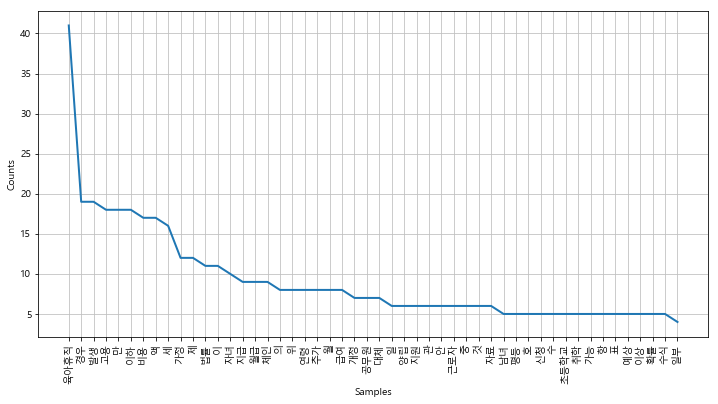

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family = font_name)

plt.figure(figsize = (12,6))
ko.plot(50)
plt.show()

In [36]:
#wordcloud로 해보기
from wordcloud import WordCloud, STOPWORDS

stopwords = ['정', '제', '및', '안', '자', '과', '수', '의', '이', '발', '위', '월', '중','것','호','항','표','전','법','률']
ko = [each_word for each_word in ko if each_word not in stopwords]

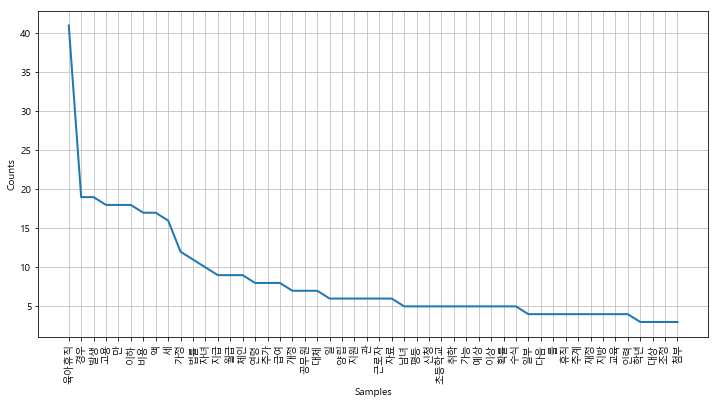

In [37]:
ko = nltk.Text(ko, name='의안 제1809893호' )
plt.figure(figsize = (12,6))
ko.plot(50)
plt.show()

In [38]:
data = ko.vocab().most_common(30) # 최빈도 단어 30개 사용

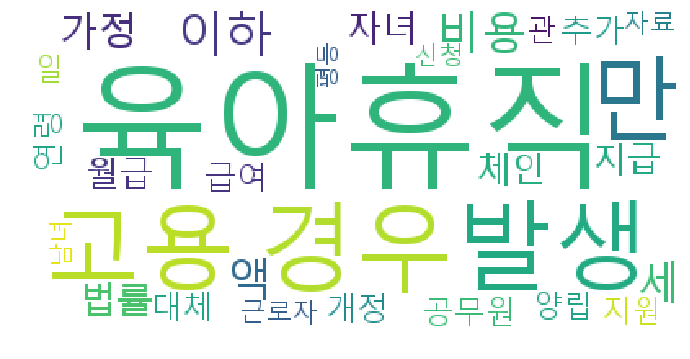

In [38]:
wordcloud = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf', background_color = 'white').generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 정규표현식

https://wikidocs.net/21703

https://regexper.com/ 정규표현식 도식화

https://regexr.com/ 바로 확인

#### . 기호 : 한 개의 임의의 문자를 나타냄(\n 제외)
- a.c -> akz, azc, avc, a5c, a!c는 모두 a.c 정규 표현식과 매치됨

In [39]:
import re
r = re.compile("a.c")
r.search("a3c")

<_sre.SRE_Match object; span=(0, 3), match='a3c'>

In [40]:
r.search("ac") # 아무런 결과도 출력되지 않는다.

#### ?기호 : ?앞의 문자가 존재하거나 존재하지 않는 경우
- ab?c -> abc, ac 모두 매치 가능

In [41]:
r = re.compile('ab?c')
r.search('abbc') # 아무런 결과도 출력되지 않는다.

In [42]:
r.search('ac')

<_sre.SRE_Match object; span=(0, 2), match='ac'>

In [43]:
r.search('abc')

<_sre.SRE_Match object; span=(0, 3), match='abc'>

#### *기호 : *앞의 문자가 0개 이상인 경우
- ab*c -> abc, ac, abbbc,abbbbbbbc 모두 매치 가능, b의 개수가 무수히 많아도 가능

In [44]:
r = re.compile('ab*c')
r.search('ac')

<_sre.SRE_Match object; span=(0, 2), match='ac'>

In [45]:
r.search('abc')

<_sre.SRE_Match object; span=(0, 3), match='abc'>

In [46]:
r.search('abbbbbbbbbbbbc')

<_sre.SRE_Match object; span=(0, 14), match='abbbbbbbbbbbbc'>

#### +기호 : +앞의 문자가 1개 이상인 경우
- ab+c -> abc, abbbc 매치, ac는 매치되지 않음. a{1,}과 동일한 의미

In [47]:
r = re.compile('ab+c')
r.search('ac')

In [48]:
r.search('abc')

<_sre.SRE_Match object; span=(0, 3), match='abc'>

In [49]:
r.search('abbbbbc')

<_sre.SRE_Match object; span=(0, 7), match='abbbbbc'>

#### ^기호 : ^로 시작되는 글자를 지정
- ^a -> a로 시작하는 문자열만 매치됨

In [50]:
r = re.compile('^a')
r.search('abcdefg')

<_sre.SRE_Match object; span=(0, 1), match='a'>

In [51]:
r.search('bce')

#### {숫자} 기호 : 해당 문자를 숫자만큼 반복한 것을 나타냄
- ab{2}c -> abbc에 매치

In [52]:
r = re.compile("ab{2}c")
r.search('abc')

In [53]:
r.search('abbc')

<_sre.SRE_Match object; span=(0, 4), match='abbc'>

In [54]:
r.search('abbbc')

#### {숫자1, 숫자2} 기호 : 해당 문자를 숫자1 이상, 숫자2 이하만큼 반복함
- ab{2,8}c -> a와 c 사이에 b가 2개 이상, 8개 이하인 문자열에 대해 매치

In [55]:
r  = re.compile('ab{2,8}c')
r.search('ac')

In [56]:
r.search('abc')

In [57]:
r.search('abbbbc')

<_sre.SRE_Match object; span=(0, 6), match='abbbbc'>

In [58]:
r.search('abbbbbbbbbc')

#### {숫자,} 기호 : 해당 문자를 숫자만큼 반복함
- ab{2,}c -> a와 c 사이에 b가 2개 이상인 문자열과 매치
- b{0,} : b*와 동일한 의미
- b{1,} : b+와 동일한 의미

In [59]:
r = re.compile("a{2,}bc")

In [60]:
r.search('abc')

In [61]:
r.search('aabc')

<_sre.SRE_Match object; span=(0, 4), match='aabc'>

In [62]:
r.search('aaaaabc')

<_sre.SRE_Match object; span=(0, 7), match='aaaaabc'>

#### [ ] 기호 : 문자들 중 한 개의 문자와 매치
- [abc] : a or b or c가 들어가있는 문자열과 매치
- [a-zA-Z] 알파벳 전부
- [0-9] 숫자 전부

In [63]:
r = re.compile('[abc]')
r.search('zzz')

In [64]:
r.search('aefg')

<_sre.SRE_Match object; span=(0, 1), match='a'>

In [65]:
r.search('baac')

<_sre.SRE_Match object; span=(0, 1), match='b'>

In [66]:
#소문자만 범위지정
re.compile('[a-z]')
r.search("ZZZ")

In [67]:
r.search('aBc')

<_sre.SRE_Match object; span=(0, 1), match='a'>

#### [ ^문자] 기호 : ^뒤에 붙은 문자들을 제외한 모든 문자를 매치하는 역할
- [^abc] : a or b or c가 아닌, 다른 문자열이 들어가면 매치


In [68]:
r = re.compile('[^abc]')
r.search('ac')


In [69]:
r.search('ABC')

<_sre.SRE_Match object; span=(0, 1), match='A'>

In [70]:
r.search('ah')

<_sre.SRE_Match object; span=(1, 2), match='h'>

- 역슬래쉬를 사용하여 자주 쓰이는 문자 규칙
  - \\ : 역슬래쉬 문자 자체
  - \d : 모든 숫자 [0-9]
  - \D : 숫자를 제외한 모든 문자 [^0-9]
  - \s : 공백 [\t\n\r\f\v]
  - \S : 공백을 제외한 문자. [^\t\n\r\f\v]
  - \w : 문자 또는 숫자 [a-zA-Z0-9]
  - \W : 문자 또는 숫자가 아닌 문자 [^a-zA-Z0-9]

### (1) re.match() 와 re.search()의 차이
- search() :  정규 표현식 전체에 대해서 문자열이 매치하는지를 본다.
- match() :  문자열의 첫 부분부터 정규 표현식과 매치하는지를 확인한다.

In [71]:
r = re.compile("ab.")
r.search("kkkabc")

<_sre.SRE_Match object; span=(3, 6), match='abc'>

In [72]:
r.match("kkkabc")

In [73]:
r.match("abckkk")

<_sre.SRE_Match object; span=(0, 3), match='abc'>

### (2) re.split()
- 입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 리턴합니다.

In [74]:
text = "사과 딸기 수박 메론 바나나"
re.split(" ", text)

['사과', '딸기', '수박', '메론', '바나나']

In [75]:
text="사과'딸기'수박'메론'바나나"
re.split("'", text)

['사과', '딸기', '수박', '메론', '바나나']

In [76]:
text="사과+딸기+수박+메론+바나나"
re.split("\+", text)

['사과', '딸기', '수박', '메론', '바나나']

### (3) re.findall()
 - 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴합니다. 단, 매치되는 문자열이 없다면 빈 리스트를 리턴합니다.

In [77]:
text="""이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""  
re.findall("\d+", text)

['010', '1234', '1234', '30']

In [78]:
re.findall("\d+", "문자열은 이렇다 숫자를 못찾지") # 빈리스트 리턴

[]

### (4) re.sub()
- sub() 함수는 정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체할 수 있습니다.
- 영어 문장에 각주 등과 같은 이유로 특수 문자가 섞여있을 때, 자연어 처리를 위해 특수 문자를 제거하고 싶다면 알파벳 외의 문자는 공백으로 처리하는 등의 사용 용도로 쓸 수 있습니다.
- 보통 특수문자 제거시 사용

In [79]:
text="Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."
re.sub('[^a-zA-Z]',' ',text)

'Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern '

In [80]:
# 정규 표현식으로 불필요한 단어의 제거 실습
text = "I was wondering if anyone out there could enlighten me on this car."
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


## 연습하기
- 1. Konlpy의 법률안 중 하나를 이용해 형태소 분석을 하고(명사 추출, 형태소 추출, 품사 태깅 등) 정재한 후, 가장 많이 나오는 30개 단어를 이용해 시각화하여 분석해보자

In [6]:
from konlpy.corpus import kobill # kobill : konlpy에 내장된 법률 읽어오는 함수
files_ko = kobill.fileids() # kobill에는 team POPANG (pokr.kr)에 의해 취합된 의회정보들이 존재
files_ko #kobill에 담긴 문서 확인

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [7]:
doc_ko = kobill.open('1809893.txt').read()
doc_ko

'남녀고용평등과 일 ·가정 양립 지원에 관한 법률 \n\n일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9893\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  현행법상 근로자가 육아휴직을 신청할 수 있는 경우는 만 6세 이하\n\n의 초등학교 취학 전 자녀를 양육하기 위한 경우임.\n\n  그런데 초등학교 1․2학년의 경우 이들을 돌보는데 세심한 주의가 \n\n필요함에도 불구하고 사회에서의 돌보는 제도가 부족하여 아동대상 \n\n성폭력 등 범죄에 노출되어있고, 이로 인해 여성 근로자들은 직장생활\n\n을 그만두고 있는 실정임. 또한 이는 여성 근로자들의 출산의욕을 저\n\n하시키는 계기가 되고 있음.\n\n  이에 자녀의 육아휴직 가능연령을 만 8세 이하로 상향조정하여 근\n\n로자의 일․가정 양립 지원을 도모하고 나아가 저출산 대책에도 기여\n\n하려는 것임(안 제19조제1항).\n\n- 1 -\n\n\x0c법률  제        호\n\n남녀고용평등과 일 ·가정 양립 지원에 관한 법률 \n\n일부개정법률안\n\n남녀고용평등과 일·가정 양립 지원에 관한 법률 일부를 다음과 같이 \n\n개정한다.\n\n제19조제1항 본문 중 “만 6세 이하의 초등학교 취학 전”을 “만 8세 이\n\n하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의”로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제19조(육아휴직) ① 사업주는 근\n\n제19조(육아휴직) ① -----------\n\n로자가 만 6세 이하의 초등학\n\n-------만 8세 이하(취학 중인 \n\n교 취학 전 자녀(입양한 자녀\n\n경우에는 초등학교 2학년 이하\n\n를 포함한다)를 양육하기

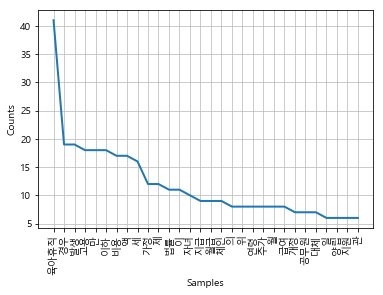

In [15]:
#Okt -- 명사분석
okt = Okt()
nouns = okt.nouns(doc_ko)
#명사 -> 가장 많이 나오는 30개
nouns = nltk.Text(nouns)
nouns.plot(30)

In [13]:
#명사 정제
stopwords = ['경우', '만', '이하', '액','세', '이', '의', '위', '월', '관', '것', '호', '수','안','항','중','표']
nouns = [i for i in nouns if i not in stopwords]
nouns = nltk.Text(nouns)

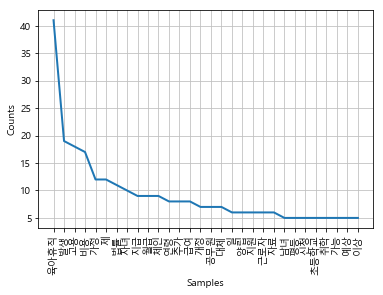

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family = font_name)
nouns.plot(30)

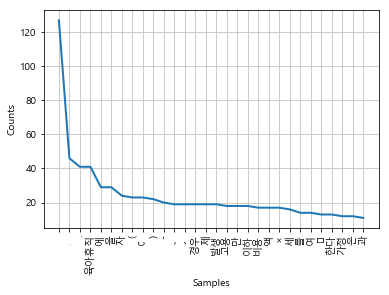

In [40]:
#형태소 추출
morphs = okt.morphs(doc_ko)
morphs = nltk.Text(morphs)
morphs.plot(30)

In [41]:
morphs

<Text: 남녀 고용 평등 과 일 · 가정 양립...>

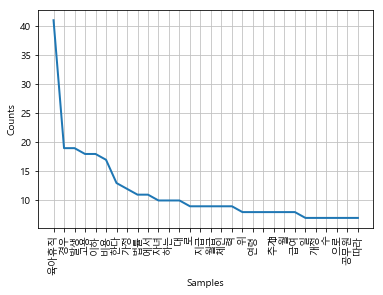

In [53]:
stopwords = ['에', '\n\n','의','.','을','자','(',')','이','x','세','를','여','은','과','제','만','-','가','한','1','2','p','×','․','액','․',',','3','4','5','6','7','8','9',':','P','N']
morphs = [i for i in morphs if i not in stopwords]
morphs=nltk.Text(morphs)
morphs.plot(30)

In [36]:
morphs.vocab()

FreqDist({'육아휴직': 41, '경우': 19, '발생': 19, '고용': 18, '이하': 18, '비용': 17, '한다': 13, '가정': 12, '법률': 11, ',': 11, ...})

In [191]:
#품사 태깅
pos1 = okt.pos(doc_ko)
pos1

[('남녀', 'Noun'),
 ('고용', 'Noun'),
 ('평등', 'Noun'),
 ('과', 'Josa'),
 ('일', 'Noun'),
 ('·', 'Punctuation'),
 ('가정', 'Noun'),
 ('양립', 'Noun'),
 ('지원', 'Noun'),
 ('에', 'Josa'),
 ('관', 'Noun'),
 ('한', 'Josa'),
 ('법률', 'Noun'),
 ('일부', 'Noun'),
 ('개정', 'Noun'),
 ('법률', 'Noun'),
 ('안', 'Noun'),
 ('\n\n', 'Foreign'),
 ('(', 'Punctuation'),
 ('정의화', 'Noun'),
 ('의원', 'Noun'),
 ('대표', 'Noun'),
 ('발의', 'Noun'),
 (')', 'Punctuation'),
 ('\n\n ', 'Foreign'),
 ('의', 'Noun'),
 ('안', 'Noun'),
 ('\n ', 'Foreign'),
 ('번', 'Noun'),
 ('호', 'Noun'),
 ('\n\n', 'Foreign'),
 ('9893', 'Number'),
 ('\n\n', 'Foreign'),
 ('발의', 'Noun'),
 ('연월일', 'Noun'),
 (':', 'Punctuation'),
 ('2010', 'Number'),
 ('.', 'Punctuation'),
 ('11', 'Number'),
 ('.', 'Punctuation'),
 ('12', 'Number'),
 ('.', 'Punctuation'),
 ('발', 'Noun'),
 ('의', 'Noun'),
 ('자', 'Noun'),
 (':', 'Punctuation'),
 ('정의화', 'Noun'),
 ('․', 'Foreign'),
 ('이명수', 'Noun'),
 ('․', 'Foreign'),
 ('김을동', 'Noun'),
 ('이사철', 'Noun'),
 ('․', 'Foreign'),
 ('여상규', 'Noun'

- 2. 휴대폰 번호와 전화번호를 모두 추출하는 정규식을 작성하고 리턴받아보자.

'\d{2,3}-?\d{4}-?\d{4}'도 가능

In [60]:
text = "제 휴대폰 번호는 010-1234-5678이고, 전화번호는 0211335577입니다."
r = re.compile('[0-9]{1,}-?[0-9]{1,}-?[0-9]{1,}')
re.findall(r, text)

['010-1234-5678', '0211335577']

In [61]:
re.sub(re.compile('[0-9]'),'*',text)

'제 휴대폰 번호는 ***-****-****이고, 전화번호는 **********입니다.'

- 3. 휴대폰 번호와 전화번호를 모두 추출하는 정규식을 작성하고 리턴받아보자.

'\d{2,3}\W?\d{4}\W?\d{4}' 도 가능

In [62]:
text = "제 휴대폰 번호는 010-1234-5678이고, 전화번호는 0211335577과 02.1133.5599입니다."
r = re.compile('[0-9]{1,}[-.]?[0-9]{1,}[-.]?[0-9]{1,}')
re.findall(r, text)

['010-1234-5678', '0211335577', '02.1133.5599']

In [59]:
re.sub(re.compile('[0-9]'),'*',text)

'제 휴대폰 번호는 ***-****-****이고, 전화번호는 **********과 **.****.****입니다.'